# Objective 

<p>
    <span style='font-family:Arial'>
    Predict the sale price of a particular piece of heavy equiment at an auction based on its usage, equipment type, and configuration.
    </span>
</p> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

# Load the Data

In [2]:
df = pd.read_csv('../input/bluebook-for-bulldozers/TrainAndValid.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

# Change the date format

In [4]:
df = pd.read_csv('../input/bluebook-for-bulldozers/TrainAndValid.csv',low_memory = False,parse_dates = ['saledate'])

In [5]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [6]:
df.sort_values(by = ['saledate'],inplace = True,ascending = True)
df.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [7]:
df['SaleYear'] = df.saledate.dt.year
df['SaleMonth'] = df.saledate.dt.month
df['SaleDay'] = df.saledate.dt.day
df['SaleDayOfWeek'] = df.saledate.dt.dayofweek
df['SaleDayOfyear'] = df.saledate.dt.dayofyear

In [8]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [9]:
df = df.drop('saledate',axis = 1)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

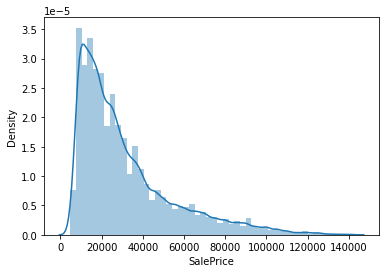

In [10]:
sns.distplot(df.SalePrice)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

## Drop the columns with many unique categories

In [12]:
max_cardinality = 100
high_cardinality = [col for col in df.select_dtypes(exclude=np.number)
                   if df[col].nunique() > max_cardinality]
df = df.drop(columns=high_cardinality)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   ProductSize               196093 non-null  object 
 10  fiProductClassDesc        412698 non-null  object 
 11  state                     412698 non-null  object 
 12  ProductGroup              412698 non-null  object 
 13  ProductGroupDesc          412698 non-nu

In [13]:
corr = df.corr()
corr

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfyear
SalesID,1.000000,0.023119,0.310149,0.147883,0.768909,-0.003298,0.005316,0.007377,0.465565,0.008000,0.029720,-0.109902,0.010487
SalePrice,0.023119,1.000000,-0.216841,-0.038063,0.021708,-0.048350,0.154389,0.015660,0.043393,-0.033374,-0.000527,-0.056015,-0.033482
MachineID,0.310149,-0.216841,1.000000,0.165140,0.375914,0.005946,-0.052118,-0.001149,0.083661,0.005383,0.003439,-0.026031,0.005633
ModelID,0.147883,-0.038063,0.165140,1.000000,0.097704,-0.017852,-0.045511,-0.006736,0.144706,-0.002906,0.007134,-0.002707,-0.002308
datasource,0.768909,0.021708,0.375914,0.097704,1.000000,-0.019021,0.070933,0.009747,0.354394,0.002488,0.005641,-0.124246,0.002675
auctioneerID,-0.003298,-0.048350,0.005946,-0.017852,-0.019021,1.000000,-0.019037,0.030911,-0.060987,0.015074,-0.015651,0.101209,0.013506
YearMade,0.005316,0.154389,-0.052118,-0.045511,0.070933,-0.019037,1.000000,-0.011598,-0.042783,0.017667,-0.011406,-0.045169,0.016959
MachineHoursCurrentMeter,0.007377,0.015660,-0.001149,-0.006736,0.009747,0.030911,-0.011598,1.000000,0.028243,-0.027272,-0.002772,0.031842,-0.028105
SaleYear,0.465565,0.043393,0.083661,0.144706,0.354394,-0.060987,-0.042783,0.028243,1.000000,-0.055154,0.037785,-0.077269,-0.052426
SaleMonth,0.008000,-0.033374,0.005383,-0.002906,0.002488,0.015074,0.017667,-0.027272,-0.055154,1.000000,-0.126323,0.039578,0.996805


# Preprocessing
* Change the data format to numeric type
* Deal with missing values

In [14]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [15]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()
        df[label] = pd.Categorical(content).codes+1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 412698 non-null  int8   
 9   ProductSize               412698 non-null  int8   
 10  fiProductClassDesc        412698 non-null  int8   
 11  state                     412698 non-null  int8   
 12  ProductGroup              412698 non-null  int8   
 13  ProductGroupDesc          412698 non-nu

In [17]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [18]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            df[label] = content.fillna(content.median())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 412698 non-null  int8   
 9   ProductSize               412698 non-null  int8   
 10  fiProductClassDesc        412698 non-null  int8   
 11  state                     412698 non-null  int8   
 12  ProductGroup              412698 non-null  int8   
 13  ProductGroupDesc          412698 non-nu

In [20]:
df.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier                   0
Tip_Control                 0
Tire_Size                   0
Coupler                     0
Coupler_Sy

# Split the data

In [21]:
val_df = df[df.SaleYear == 2012]
train_df = df[df.SaleYear != 2012]

In [22]:
x_train = train_df.drop('SalePrice',axis = 1)
y_train = train_df['SalePrice']
x_valid = val_df.drop('SalePrice',axis = 1)
y_valid = val_df['SalePrice']

In [23]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 51), (401125,), (11573, 51), (11573,))

# Build a scoring function

In [24]:
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(x_train, y_train),
              "Valid R^2": model.score(x_valid, y_valid)}
    return scores

# Model

In [25]:
%%time
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42)
model.fit(x_train,y_train)

CPU times: user 13min 49s, sys: 3.36 s, total: 13min 53s
Wall time: 3min 32s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [26]:
scores(model)

{'Training MAE': 1636.9115764412588,
 'Valid MAE': 6483.831832714076,
 'Training RMSLE': 0.08807700470606009,
 'Valid RMSLE': 0.27159095516479514,
 'Training R^2': 0.9865631614797794,
 'Valid R^2': 0.8569492488577077}

# Hyperparameter tuning with RandomizedSearchCV

In [27]:
%%time

grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10,15,20],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [20000]}

model1 = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions= grid,
                              n_iter=40,
                              cv=5,
                              verbose=True)

model1.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
CPU times: user 15min 58s, sys: 8.52 s, total: 16min 6s
Wall time: 16min 6s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=40,
                   param_distributions={'max_depth': [None, 3, 5, 10, 15, 20],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [28]:
scores(model1)

{'Training MAE': 5341.502119129086,
 'Valid MAE': 7260.775512942172,
 'Training RMSLE': 0.24971989366746347,
 'Valid RMSLE': 0.294704856603595,
 'Training R^2': 0.8673378613504504,
 'Valid R^2': 0.8211796210812566}

In [29]:
model1.best_params_

{'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_samples': 20000,
 'max_features': 'auto',
 'max_depth': None}

# Train model with best parameters

In [30]:
%%time

tuned_model = RandomForestRegressor(n_estimators=60,
                                    min_samples_leaf=1,
                                    min_samples_split=12,
                                    max_features=0.5,
                                    n_jobs=-1)
tuned_model.fit(x_train, y_train)

CPU times: user 3min 57s, sys: 510 ms, total: 3min 58s
Wall time: 1min 1s


RandomForestRegressor(max_features=0.5, min_samples_split=12, n_estimators=60,
                      n_jobs=-1)

In [31]:
scores(tuned_model)

{'Training MAE': 2930.4090332042497,
 'Valid MAE': 6517.110256670911,
 'Training RMSLE': 0.1457242915625598,
 'Valid RMSLE': 0.27094893075177123,
 'Training R^2': 0.9590321056997082,
 'Valid R^2': 0.8582582205523841}

# Load the test data set

In [32]:
Test_data = pd.read_csv('../input/bluebook-for-bulldozers/Test.csv',parse_dates = ['saledate'])
Test_data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


# Preprocessing
In the same format as training data

In [33]:
def processed_data(df):
    df['SaleYear'] = df.saledate.dt.year
    df['SaleMonth'] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.dayofweek
    df["SaleDayOfyear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isna(content).sum():
                df[label] = content.fillna(content.median())
                
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()
            df[label] = pd.Categorical(content).codes+1
            
    return df     


In [34]:
processed_data(Test_data)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfyear
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,0,0,0,0,0,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,0,0,0,3,2,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,0,0,0,0,0,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,0,0,0,0,0,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,1,4,5,0,0,2012,5,10,3,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,0,0,0,0,0,2012,10,24,2,298
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,0,0,0,0,0,2012,10,24,2,298
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,0,0,0,0,0,2012,10,24,2,298
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,0,0,0,0,0,2012,10,24,2,298


In [35]:
max_cardinality = 100
high_cardinality = [col for col in Test_data.select_dtypes(exclude=np.number)
                   if Test_data[col].nunique() > max_cardinality]
Test_data = Test_data.drop(columns=high_cardinality)
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  12457 non-null  float64
 7   UsageBand                 12457 non-null  int8   
 8   fiModelDesc               12457 non-null  int16  
 9   fiBaseModel               12457 non-null  int16  
 10  fiSecondaryDesc           12457 non-null  int8   
 11  fiModelSeries             12457 non-null  int8   
 12  fiModelDescriptor         12457 non-null  int8   
 13  ProductSize               12457 non-null  int8   
 14  fiProd

In [36]:
set(Test_data.columns)-set(x_train.columns)

{'fiBaseModel',
 'fiModelDesc',
 'fiModelDescriptor',
 'fiModelSeries',
 'fiSecondaryDesc'}

In [37]:
Test_data = Test_data.drop(['fiBaseModel','fiModelDesc','fiModelDescriptor','fiModelSeries','fiSecondaryDesc'],axis = 1)

# Predict on test data

In [38]:
test_preds = tuned_model.predict(Test_data)

# Submission

In [39]:
sub = pd.DataFrame()
sub["SalesID"] = Test_data["SalesID"]
sub["SalePrice"] = test_preds
sub

,SalesID,SalePrice
0,1227829,18151.822726
1,1227844,27082.389303
2,1227847,51504.147903
3,1227848,79793.104344
4,1227863,39804.865490
...,...,...
12452,6643171,39021.873774
12453,6643173,13281.240436
12454,6643184,13003.758863
12455,6643186,16384.800796
